In [43]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Constantes
r_bohr = 5.29177e-11  # Raio de Bohr em metros
m_hydrogen = 1.67e-27  # Massa do núcleo de hidrogênio em kg
h_bar = 1.0545718e-34  # Constante de Planck reduzida em J s

In [44]:
# Propriedades das esferas
R = r_bohr  # Raio das esferas (raio de Bohr)
m_sphere = m_hydrogen  # Massa das esferas (massa do núcleo de hidrogênio)

# Condições iniciais
initial_position = np.array([0, 0])  # Posição inicial das esferas
initial_velocity = np.array([20 * R, 0])  # Velocidade inicial das esferas

In [45]:
def update_position_velocity(x, v, dt):
    # Derivadas em t
    k1 = v * dt
    m1 = np.zeros_like(v)  # Não consideraremos acelerações aqui

    # Derivadas em t + dt/2
    k2 = (v + 0.5 * m1) * dt
    m2 = np.zeros_like(v)  # Não consideraremos acelerações aqui

    # Derivadas em t + dt
    k3 = (v + m2) * dt
    m3 = np.zeros_like(v)  # Não consideraremos acelerações aqui

    # Atualização da posição e da velocidade usando o método de Simpson
    new_x = x + k1 + 4 * k2 + k3
    new_v = v + (m1 + 4 * m2 + m3) / 6

    return new_x, new_v

In [46]:
# Atualização da posição e da velocidade com colisões nas paredes
def update_position_velocity_with_collisions(x, v, dt):
    new_x, new_v = update_position_velocity(x, v, dt)

    # Lógica para colisões com as paredes da caixa
    for i in range(2):
        for j in range(2):
            if new_x[i, j] < -50 * R or new_x[i, j] > 50 * R:
                new_v[i, j] = -new_v[i, j]

    return new_x, new_v

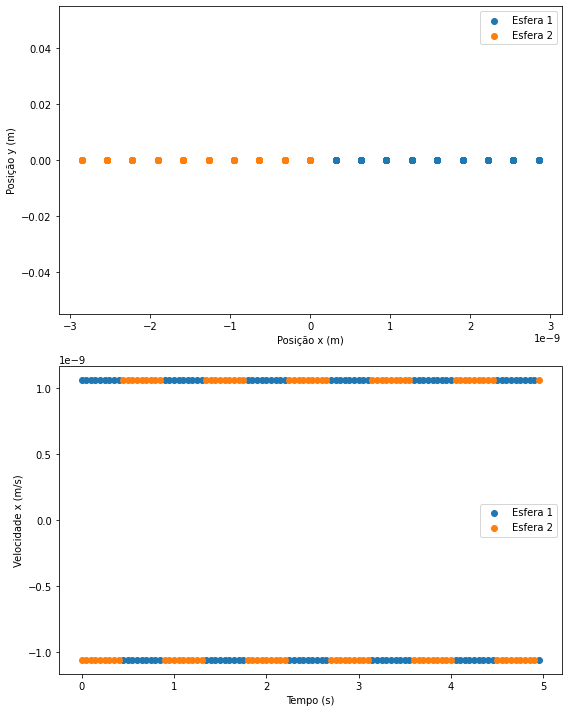

In [47]:
# Parâmetros da simulação
total_time = 5  # Tempo total da simulação em segundos
dt = 0.05  # Intervalo de tempo em segundos
num_steps = int(total_time / dt)

# Inicialização de arrays para armazenar os resultados
positions = np.zeros((num_steps, 2, 2))
velocities = np.zeros((num_steps, 2, 2))

# Condições iniciais
positions[0] = np.array([initial_position, initial_position])
velocities[0] = np.array([initial_velocity, -initial_velocity])

# Simulação
for step in range(1, num_steps):
    positions[step], velocities[step] = update_position_velocity_with_collisions(
        positions[step - 1], velocities[step - 1], dt
    )

    # Detecção e tratamento de colisões
    distance = np.linalg.norm(positions[step, 0] - positions[step, 1])
    if distance < 2 * R:  # Colisão ocorreu
        # Calcular novas velocidades após a colisão (conservação do momento)
        v1_f = velocities[step, 0] - 2 * m_sphere / (m_sphere + m_sphere) * np.dot(velocities[step, 0] - velocities[step, 1], positions[step, 0] - positions[step, 1]) / np.linalg.norm(positions[step, 0] - positions[step, 1]) ** 2 * (positions[step, 0] - positions[step, 1])
        v2_f = velocities[step, 1] - 2 * m_sphere / (m_sphere + m_sphere) * np.dot(velocities[step, 1] - velocities[step, 0], positions[step, 1] - positions[step, 0]) / np.linalg.norm(positions[step, 1] - positions[step, 0]) ** 2 * (positions[step, 1] - positions[step, 0])

        # Atualizar as velocidades após a colisão
        velocities[step, 0] = v1_f
        velocities[step, 1] = v2_f

# Visualização dos gráficos da posição e da velocidade
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

ax1.scatter(positions[:, 0, 0], positions[:, 0, 1], label="Esfera 1")
ax1.scatter(positions[:, 1, 0], positions[:, 1, 1], label="Esfera 2")
ax1.set_xlabel("Posição x (m)")
ax1.set_ylabel("Posição y (m)")
ax1.legend()

ax2.scatter(np.arange(num_steps) * dt, velocities[:, 0, 0], label="Esfera 1")
ax2.scatter(np.arange(num_steps) * dt, velocities[:, 1, 0], label="Esfera 2")
ax2.set_xlabel("Tempo (s)")
ax2.set_ylabel("Velocidade x (m/s)")
ax2.legend()

plt.tight_layout()
plt.show()

In [48]:
# Função para criar a animação
def animate_positions(i):
    ax.clear()
    ax.scatter(positions[i, 0, 0], positions[i, 0, 1], c='blue', label="Esfera 1")
    ax.scatter(positions[i, 1, 0], positions[i, 1, 1], c='red', label="Esfera 2")
    ax.set_xlim(-50 * R, 50 * R)
    ax.set_ylim(-50 * R, 50 * R)
    ax.set_xlabel("Posição x (m)")
    ax.set_ylabel("Posição y (m)")
    ax.set_title(f"Tempo = {i * dt:.2f} segundos")
    ax.legend()

# Criação da animação em formato de GIF
fig, ax = plt.subplots(figsize=(8, 8))
ani = FuncAnimation(fig, animate_positions, frames=num_steps, interval=100)
plt.close()

# Salvando o GIF
gif_filename = "collision_simulation.gif"
ani.save(gif_filename, writer="imagemagick")
print("GIF criado com sucesso:", gif_filename)

MovieWriter imagemagick unavailable; using Pillow instead.


GIF criado com sucesso: collision_simulation.gif
